Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device - ---- protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly           charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

# import the libraries

In [1]:
#Main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

#Algorithms
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
#Tuning
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Data Exploration

## import the data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Check for missing values.
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# Description of the data in the dataframe.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Drop the column customerID, since it is not necessary for our analysis.
df=df.drop('customerID', axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
# Percentage of customers that were retained and left .
df['Churn'].value_counts(normalize=True)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [10]:
def CountPlot_Table (feature):
    sns.countplot(x=feature, hue="Churn", data=df)
    sns.despine()
    temp_table = pd.DataFrame(round(df.groupby(feature)['Churn'].value_counts(normalize = True),4))
    table = plt.table(cellText=temp_table.values,
          rowLabels=temp_table.index,
          colLabels=temp_table.columns,
          bbox=(1.5, 0,0.4 , 0.45))
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    plt.show()

In [11]:
objectlist=df.select_dtypes(include=['object']).columns.tolist()
objectlist.remove('TotalCharges')

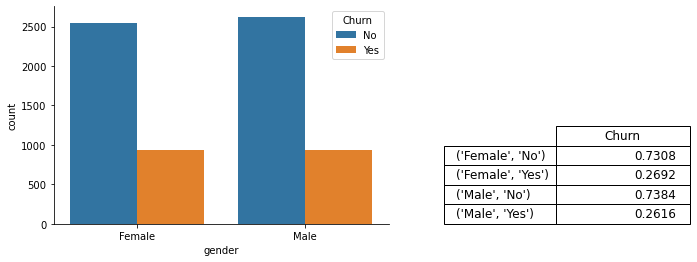

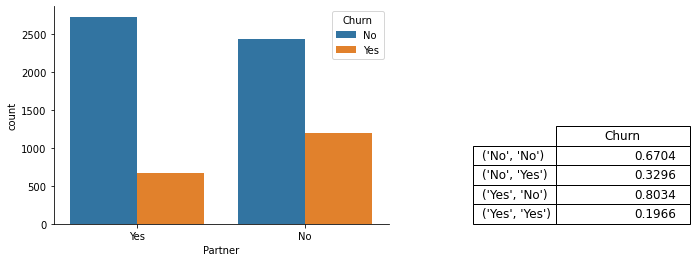

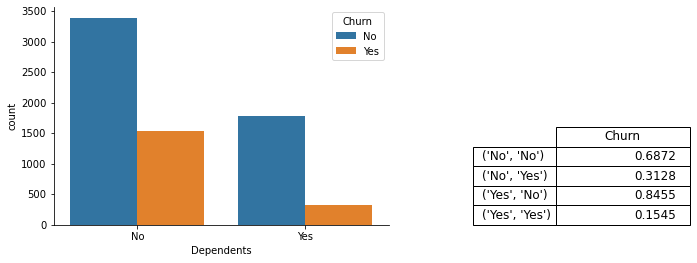

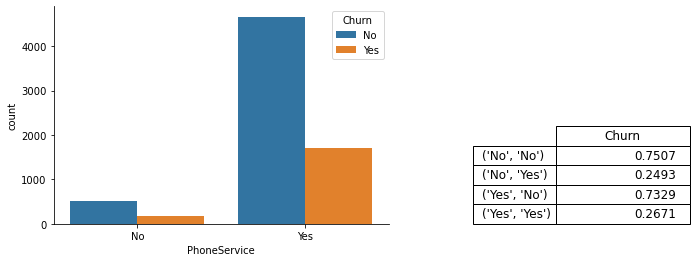

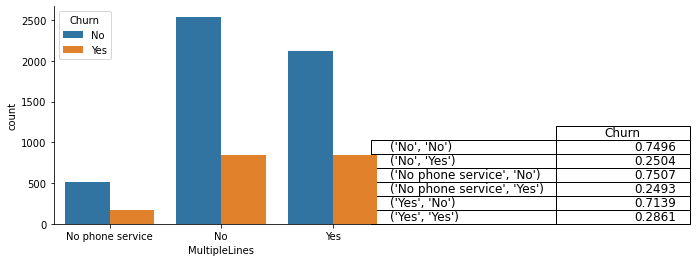

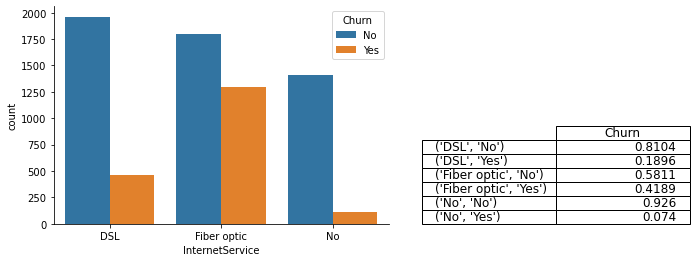

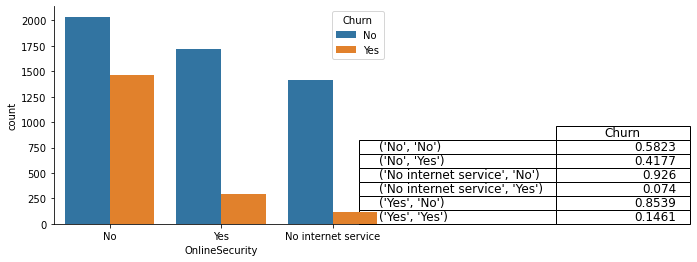

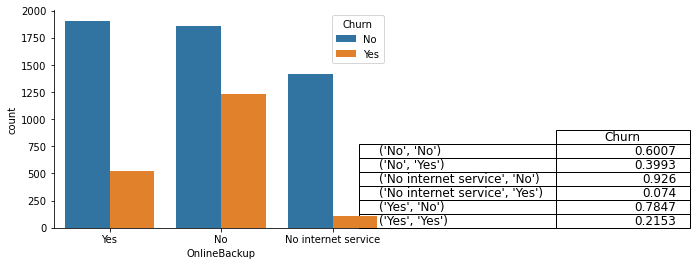

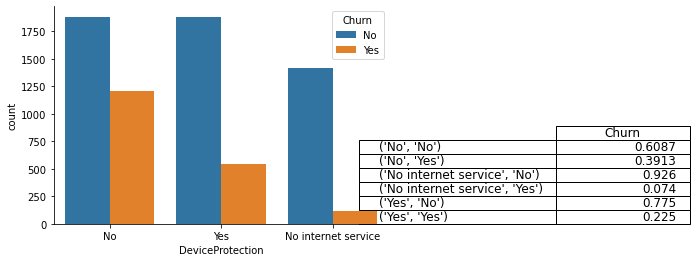

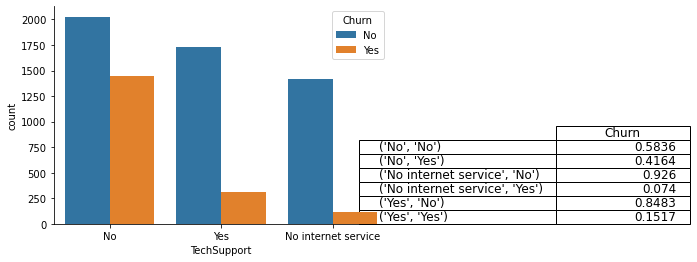

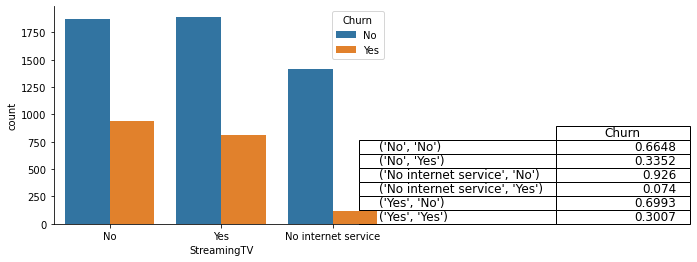

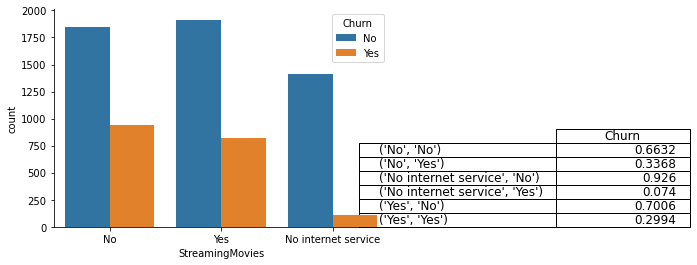

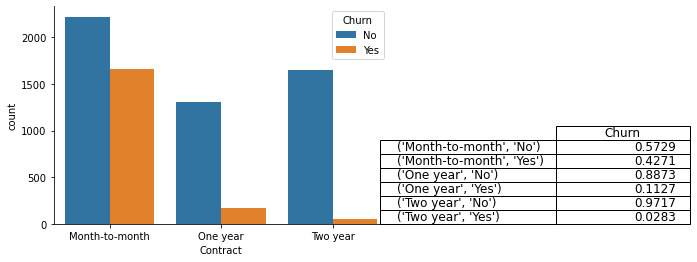

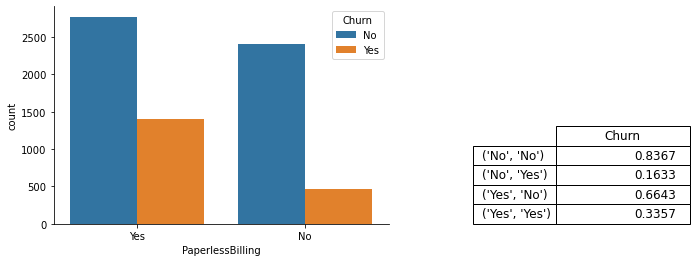

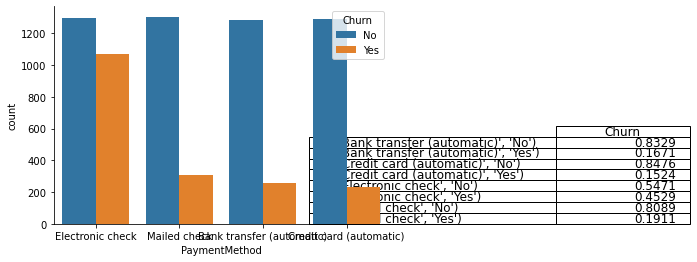

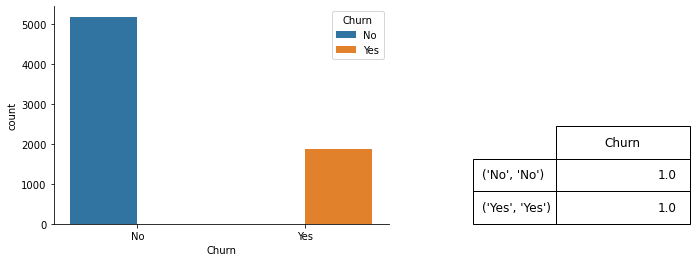

In [12]:
for feature in objectlist:
    CountPlot_Table(feature)

### Insights

- **Gender**  : Gender does not appear to be a significant factor when it comes to customer churn.
- **Partner** : It appears that most of the customers that churn, do not have partners.
- **Dependents** : The majority of the customers that left the company did not have dependents.
- **PhoneService** : PhoneService does not appear to be a significant factor when it comes to customer churn.
- **MultipleLines** : MultipleLines does not appear to be a significant factor when it comes to customer churn.
- **InternetService** : Most of the customers with fiber optic churned followed by DLS customers Finally, with fewer churned is customers with no Internet Service.
- **OnlineSecurity** : The majority of the customers that churned, did not have an online security.
- **OnlineBackup** : The majority of the customers that left the company did not have an online backup service
- **DeviceProtection** : Most of the churned customers did not have a device protection service.
- **TechSupport** : The majority of the customers that churned did not have a tech support service.
- **StreamingTV** : The streaming tv service does not appear to be significant when it comes to customer churn.
- **StreamingMovies** : The streaming movies service does not appear to be a significant factor for customer churn.
- **Contract** : Month-to-month contracts seem to have the highest amount of churned customers, while 2-year contracts have the least amount of churned customers, followed by 1-year contracts.
- **PaperlessBilling** : The majority of the customers that left the company had opted for paperless billing.
- **PaymentMethod** : Most of the customers that churned had chosen the electronic check as the payment method.

# Data Processing and Cleaning

In [13]:
# correct dtype for columns.
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [15]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [16]:
df=df.drop(df[df['TotalCharges']==' '].index)

In [18]:
#TotalCharges
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7032.00,32.42,24.55,1.00,9.00,29.00,55.00,72.00
MonthlyCharges,7032.00,64.80,30.09,18.25,35.59,70.35,89.86,118.75
TotalCharges,7032.00,2283.30,2266.77,18.80,401.45,1397.47,3794.74,8684.80


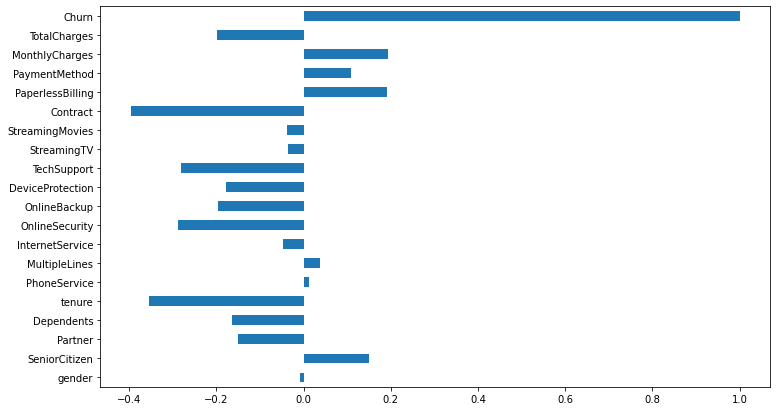

In [71]:
# Plotting important features
plt.figure(figsize= (12,7))
df.corr().T['Churn'].plot(kind= 'barh');


# Model selection

In [19]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Churn'])
y= df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  6.66it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
BernoulliNB                        0.74               0.76    None      0.75   
NearestCentroid                    0.74               0.75    None      0.75   
GaussianNB                         0.71               0.75    None      0.72   
SGDClassifier                      0.78               0.74    None      0.79   
Perceptron                         0.76               0.74    None      0.77   
QuadraticDiscriminantAnalysis      0.72               0.74    None      0.74   
LinearDiscriminantAnalysis         0.79               0.71    None      0.78   
LogisticRegression                 0.80               0.71    None      0.79   
LinearSVC                          0.80               0.71    None      0.78   
CalibratedClassifierCV             0.80               0.71    None      0.78   
RidgeClassifier                    0.79 

# LogisticRegression Tuning

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['Partner'] = encoder.fit_transform(df['Partner'])
df['Dependents'] = encoder.fit_transform(df['Dependents'])
df['PhoneService'] = encoder.fit_transform(df['PhoneService'])
df['MultipleLines'] = encoder.fit_transform(df['MultipleLines'])
df['InternetService'] = encoder.fit_transform(df['InternetService'])
df['OnlineSecurity'] = encoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = encoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = encoder.fit_transform(df['DeviceProtection'])
df['TechSupport'] = encoder.fit_transform(df['TechSupport'])
df['StreamingTV'] = encoder.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = encoder.fit_transform(df['StreamingMovies'])
df['Contract'] = encoder.fit_transform(df['Contract'])
df['PaperlessBilling'] = encoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = encoder.fit_transform(df['PaymentMethod'])
df['Churn'] = encoder.fit_transform(df['Churn'])

In [49]:
X = df.drop('Churn', axis=1)
y = df[['Churn']]

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25 , random_state = 44 , shuffle = True)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5274, 19), (1758, 19), (5274, 1), (1758, 1))

In [51]:
logModel = LogisticRegression()

In [52]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [55]:
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


In [56]:
best_clf.best_estimator_

LogisticRegression(C=4.281332398719396, solver='liblinear')

In [65]:
print(f'Train Score is : {clf.score(X_train, y_train)}')
print(f'Test Score is : {clf.score(X_test, y_test)}')
y_pred = clf.predict(X_test)
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )
print(f'Precision value is  : {ClassificationReport.split()[19]}')
print(f'Recall value is  : {ClassificationReport.split()[20]}')
print(f'F1 Score value is  : {ClassificationReport.split()[21]}')

Train Score is : 0.8037542662116041
Test Score is : 0.8065984072810012
Classification Report is : 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1283
           1       0.66      0.57      0.62       475

    accuracy                           0.81      1758
   macro avg       0.76      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758

Precision value is  : 0.76
Recall value is  : 0.73
F1 Score value is  : 0.74


In [57]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')

Accuracy - : 0.804
